# Part II - (E-Commerce Super Store Dataset Exploration)
## by (Mahdi Ben Fekih)


## Investigation Overview


>In this investigation, I tried to look into the main variables that affect the profit. The main focus were alloted to profit and sales.


## Dataset Overview

> The dataset selected for this project is a sample from an E-commerce super store sales that operates on a global scale. The dataset is added to the submission folder. Through a detailed, meticulous exploratory analysis and with the help of data visualization, a variety of data trends were uncovered. This jupyter notebook contains different parts, ranging from data wrangling to univariate, bivariate and multivariate data visualization.

In [1]:
# import all packages and set plots to be embedded inline

#import libraries
import numpy as np             
import pandas as pd                                                     
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sb                                                   
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#Setting font
sb.set(font_scale=1.3)

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
df1 = df.loc[df['country'].isin(['United States','China','India','United Kingdom', 'France', 'Germany', 'Australia',
                                 'Mexico', 'Spain', 'El Salvador', 'Cuba', 'Nicaragua', 'Brazil', 'Guatemala', 'Iran', 'Austria',
                                'Japan', 'Morocco' , 'Russia', 'South Africa'])]

In [4]:
# convert ship_mode and order_priority into ordered categorical types
ordinal_var_dict = {'ship_mode': ['Standard Class','Second Class','First Class','Same Day'],
                    'order_priority': ['Low', 'Medium', 'High', 'Critical'] }
                    

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): 
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df1[var] = df1[var].astype(ordered_var)
    else: # pre-v0.21
        df1[var] = df1[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [5]:
# Dropping unecessary columns : Region was dropped because it was summarized by another column (market)
df1.drop(['customer_name', 'region', 'state'], axis=1, inplace=True) 

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Countries and Market Share

#### With 20 countries included and 6 market where operates this online store, The US is the first ranking country ordering and market share wise.

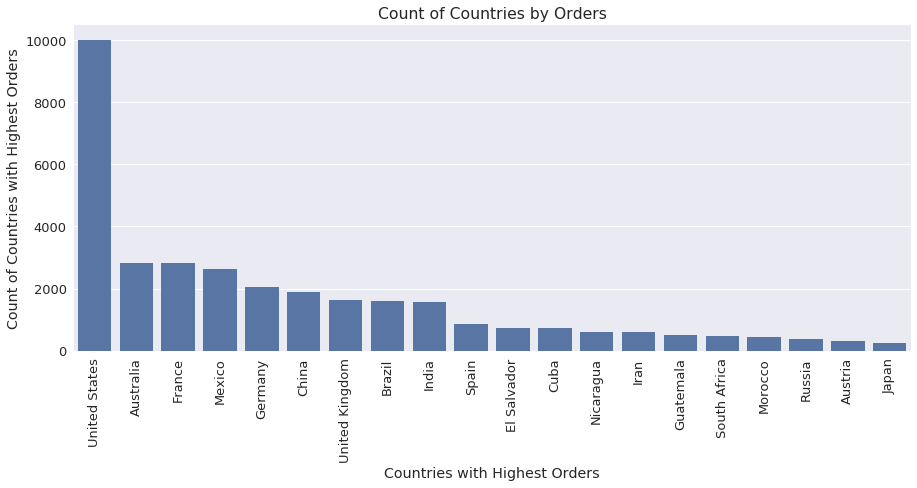

In [6]:
plt.figure(figsize=(15,6))
base_color = sb.color_palette()[0]
c_order  = df1.country.value_counts().index
plt.xticks(rotation = 90)
sb.countplot(data=df1, x='country', color=base_color, order = c_order); 
plt.ylabel('Count of Countries with Highest Orders')
plt.xlabel('Countries with Highest Orders')
plt.title('Count of Countries by Orders');

In [7]:
mysum = df1['market'].value_counts().values.sum()

In [8]:
#This function is used twice, in Pie Chart of Different Regions Market share and in Pie Chart of Employed Shipping Methods.
def label_pie(percent):
    x = np.round(percent/100 * mysum)
    return "{0}({1}%)".format(x, np.round(percent))

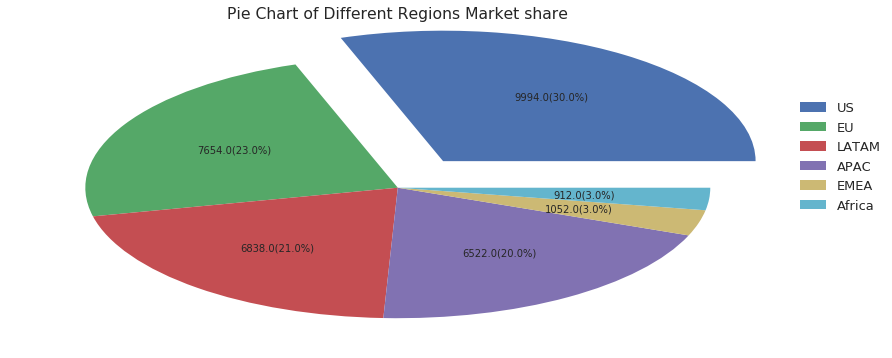

In [11]:
plt.pie(df1['market'].value_counts(), explode=[0.25,0,0,0,0,0], autopct = label_pie)
plt.legend(df1['market'].value_counts().index, bbox_to_anchor=(1,.8));
plt.title('Pie Chart of Different Regions Market share')
rcParams['figure.figsize'] = 13,6;

## Most profitable markets and categories

#### It is found that APAC and EU, although do not possess the highest order count, they actually incur more profit than the US. It is also found that Technology category is the most profitable.


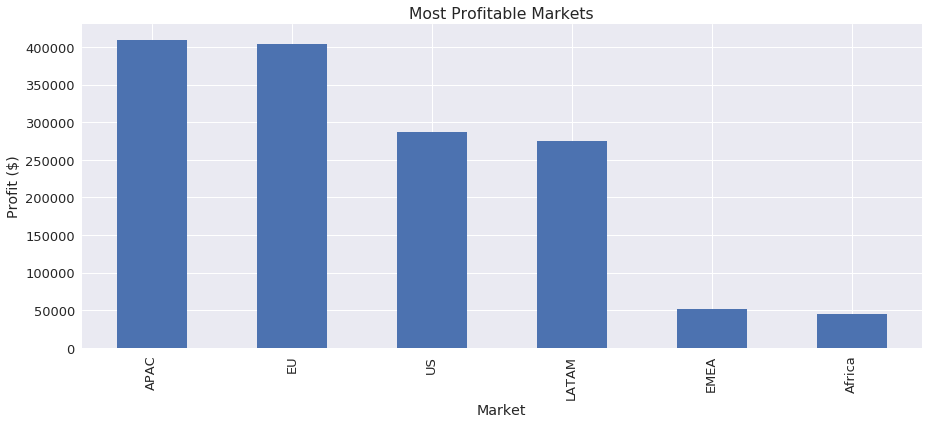

In [12]:
df1.groupby('market').profit.sum().nlargest(6).plot(kind='bar', color=sb.color_palette()[0]);
rcParams['figure.figsize'] = 10,10;
plt.title('Most Profitable Markets')
plt.xlabel('Market')
plt.ylabel('Profit ($)')
plt.tight_layout();

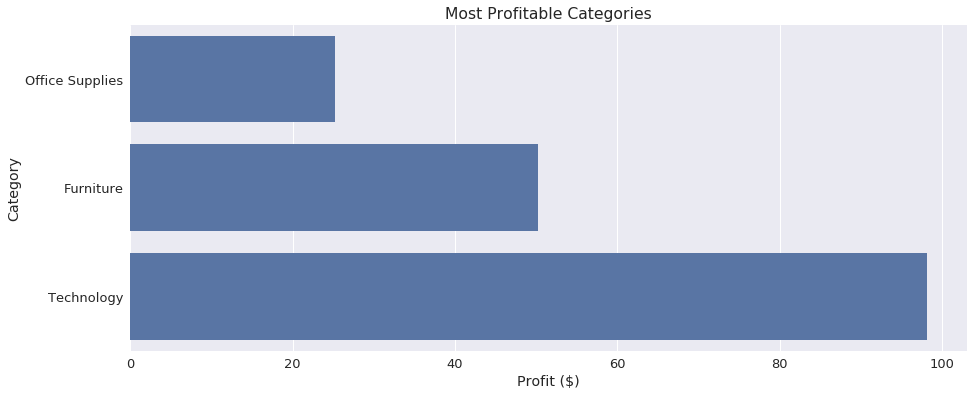

In [13]:
plt.figure(figsize=(15,6))
sb.barplot(data=df1, x = 'profit', y='category', ci=None, color=sb.color_palette()[0]);
plt.title('Most Profitable Categories')
plt.xlabel('Profit ($)')
plt.ylabel('Category');

## Correlation heatmap of numeric variables.

#### Profit is mainly explained by shipping cost on a high level, and sales on a lesser level.

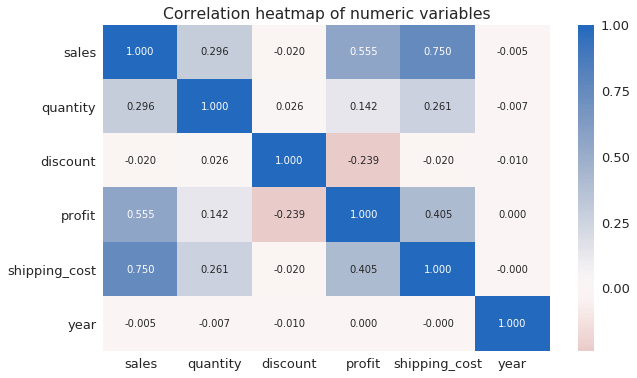

In [14]:
numeric_vars = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'year']
# correlation plot
plt.figure(figsize = [10, 6])
sb.heatmap(df1[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation heatmap of numeric variables');
plt.show()

## A deeper look into the relation between profit, shipping cost and goods category.

#### This visualization not only confirms the strong correlation between profit and shipping cost, but also how Technology highly contributes to the profit.

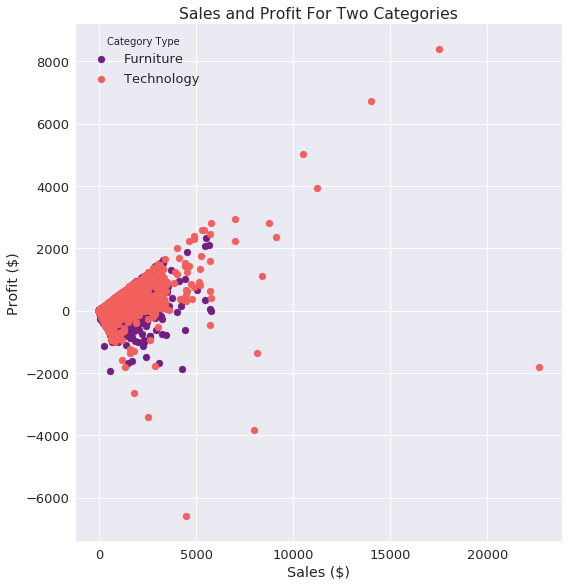

In [15]:
df1_sub = df1.loc[df1['category'].isin(['Technology','Furniture'])]
g = sb.FacetGrid(data = df1_sub, hue = 'category', size = 8, palette = 'magma')
g.map(plt.scatter, 'sales','profit')
# add labels and titles
g.set_xlabels('Sales ($)')
g.set_ylabels('Profit ($)')
plt.title('Sales and Profit For Two Categories')
plt.legend(['Furniture', 'Technology'], title = 'Category Type');

## Revealing the most profitable / most loss incuring items.

#### Phones are the most profitable items wheras tables incurs heavy loses in the furniture category.

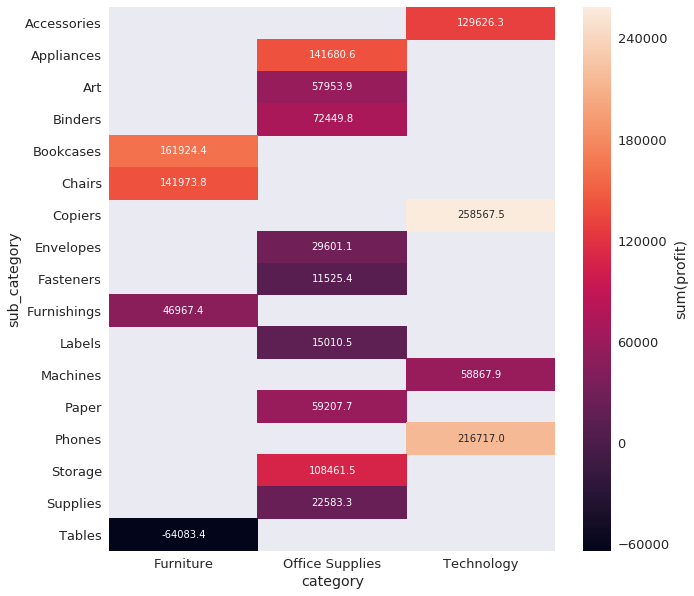

In [16]:
cat_means = df.groupby(['category', 'sub_category']).sum()['profit']
cat_means = cat_means.reset_index(name = 'profit_avg')
cat_means = cat_means.pivot(index = 'sub_category', columns = 'category',
                            values = 'profit_avg')
sb.heatmap(cat_means, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'sum(profit)'});
rcParams['figure.figsize'] = 16,10;

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 547298 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 